### Data Description

The main data are in the csv file : order_data.csv

- createdAt : the order creation timestamp
- status : the order status (complete, canceled, etc.)
- restaurantName : the restaurant name attached to the order 
- pickupDeadline : timestamp corresponding to the ETA of the driver in the restaurant
- driverArrivedAtRestaurantAt : timestamp corresponding to the arrival time of the driver in the restaurant
- pickedAt : timestamp corresponding to the driver picking the food in the restaurant

The restaurant area data are in the csv file : restaurantarea_data.csv

- restaurantName : the restaurant name
- area : the speaking area for the restaurant

### Data Preparation 

Take the data from the 2021-01-25 to 2021-01-31 and only consider complete orders and remove the orders with missing timestamps.

### Questions 

- What are the most popular restaurants in number of orders ? 
- At which time of the day do we have a peak in average ? ex : between 11:00 and 12:00 ? between 18:00 and 19:00 ?
- For each restaurant compute the average waiting time for the driver : pickedAt - driverArrivedAtRestaurantAt
- If the waiting time is to high (> 6min), add a warning flag to the restaurant 
- Make a join with the restaurant's area data and compute the waiting time per area

# DATA PREPARATION and Table Join

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('order_data.csv')
areas = pd.read_csv('restaurantarea_data.csv')
data.head()
#data.info()

,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt
0,2021-01-23 02:47:48.591,complete,Red Pat - Craft Burgers & Beer,2021-01-23 11:56:00.000,2021-01-23 11:27:06.642,2021-01-23 11:53:01.951
1,2021-01-23 10:14:44.008,complete,GoodFood Basel,2021-01-23 10:38:00.000,2021-01-23 10:45:42.651,2021-01-23 11:02:28.023
2,2021-01-23 10:39:55.361,complete,Pizza Princess Zürich,2021-01-23 11:21:00.000,2021-01-23 10:51:28.457,2021-01-23 10:52:12.325
3,2021-01-23 11:16:31.605,complete,Pizza Princess Genève,2021-01-23 11:51:00.000,2021-01-23 11:17:25.408,2021-01-23 11:28:04.077
4,2021-01-23 11:20:53.335,error_payment,GoodFood Basel,2021-01-23 11:40:00.000,NaN,NaN


In [2]:
# Merge the 2 tables:
data = pd.merge(data,areas,how='left',on='restaurantName')
data

,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt,area
0,2021-01-23 02:47:48.591,complete,Red Pat - Craft Burgers & Beer,2021-01-23 11:56:00.000,2021-01-23 11:27:06.642,2021-01-23 11:53:01.951,FR
1,2021-01-23 10:14:44.008,complete,GoodFood Basel,2021-01-23 10:38:00.000,2021-01-23 10:45:42.651,2021-01-23 11:02:28.023,DE
2,2021-01-23 10:39:55.361,complete,Pizza Princess Zürich,2021-01-23 11:21:00.000,2021-01-23 10:51:28.457,2021-01-23 10:52:12.325,DE
3,2021-01-23 11:16:31.605,complete,Pizza Princess Genève,2021-01-23 11:51:00.000,2021-01-23 11:17:25.408,2021-01-23 11:28:04.077,FR
4,2021-01-23 11:20:53.335,error_payment,GoodFood Basel,2021-01-23 11:40:00.000,NaN,NaN,DE
...,...,...,...,...,...,...,...
995,2021-02-01 20:29:04.022,complete,Maria - Rive Gauche,2021-02-01 20:44:00.000,2021-02-01 20:33:04.304,2021-02-01 20:46:30.010,FR
996,2021-02-01 20:31:02.898,error_payment,Maria - Rive Gauche,2021-02-01 21:11:00.000,NaN,NaN,FR
997,2021-02-01 20:36:39.308,complete,GoodFood Basel 2,2021-02-01 20:58:00.000,2021-02-01 20:57:58.060,2021-02-01 21:03:54.041,DE
998,2021-02-01 21:36:09.875,complete,GoodFood Basel 2,2021-02-01 22:10:00.000,2021-02-01 21:44:05.642,2021-02-01 21:55:21.870,DE


In [3]:
# Get only complete orders, drop null values, convert time columns in date format:
complete_orders = data[(data['status'] == "complete") & (data['pickedAt'].notnull())]
#print(complete_orders.isna().any())
complete_orders[['createdAt','driverArrivedAtRestaurantAt','pickupDeadline','pickedAt']]= complete_orders[['createdAt','driverArrivedAtRestaurantAt','pickupDeadline','pickedAt']].apply(pd.to_datetime)
complete_orders.info()

# Get the data only for the specific date range:
mask = (complete_orders['createdAt'] > '2021.01.25') & (complete_orders['createdAt'] <= '2021.01.31')
complete_orders = complete_orders.loc[mask]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   createdAt                    825 non-null    datetime64[ns]
 1   status                       825 non-null    object        
 2   restaurantName               825 non-null    object        
 3   pickupDeadline               825 non-null    datetime64[ns]
 4   driverArrivedAtRestaurantAt  825 non-null    datetime64[ns]
 5   pickedAt                     825 non-null    datetime64[ns]
 6   area                         825 non-null    object        
dtypes: datetime64[ns](4), object(3)
memory usage: 51.6+ KB


/Users/gozde/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# Most Popular Restaurants

Maria                             65
GoodFood Basel 2                  63
GoodFood Genève                   57
GoodFood Basel                    55
Red Pat - Craft Burgers & Beer    49
Name: restaurantName, dtype: int64
Maria seems to be the most popular restaurant. GoodFood Basel 2 is as popular as Maria. ~36% orders belong to GoodFood Basel 2 + GoodFood Geneva + GoodFood Basel)


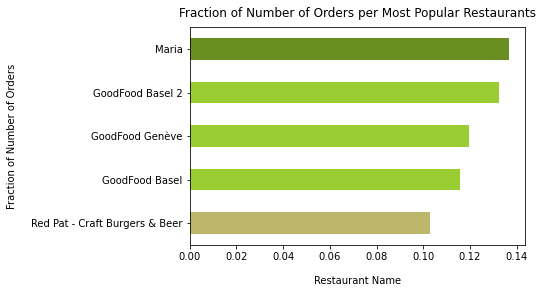

In [4]:
complete_orders['restaurantName'].value_counts(normalize=True)[:5].sort_values(ascending=True).plot(kind='barh', color = ['darkkhaki','yellowgreen','yellowgreen','yellowgreen','olivedrab']);
plt.xlabel("Restaurant Name", labelpad=14)
plt.ylabel("Fraction of Number of Orders", labelpad=14)
plt.title("Fraction of Number of Orders per Most Popular Restaurants", y=1.02)
print(complete_orders.restaurantName.value_counts().head())
print('Maria seems to be the most popular restaurant. GoodFood Basel 2 is as popular as Maria. ~36% orders belong to GoodFood Basel 2 + GoodFood Geneva + GoodFood Basel)')


# PICK HOURS

There are 2 peak hours. As expected one is in mid day between 12:00 - 13:00 and the other and bigger peak is in the afternoon between 18:00-20:30.


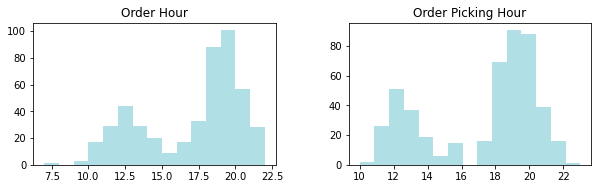

In [6]:
complete_orders['Order Hour'] = complete_orders['createdAt'].dt.hour
complete_orders['Order Picking Hour'] = complete_orders['pickedAt'].dt.hour
complete_orders[['Order Hour','Order Picking Hour']].astype(np.int64).hist(color='powderblue', layout=(2,2),bins = 15,figsize=(10,6), grid=False);
print("There are 2 peak hours. As expected one is in mid day between 12:00 - 13:00 and the other and bigger peak is in the afternoon between 18:00-20:30.")


# Waiting Times 


#### Waiting Times per order

In [7]:
# Calculate the waiting time per driver for each order

complete_orders['WaitingTime_min'] = (complete_orders['pickedAt']-complete_orders['driverArrivedAtRestaurantAt']) / np.timedelta64(1, "s") / 60

complete_orders.sort_values('WaitingTime_min',ascending=False).head(5)


,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt,area,Order Hour,Order Picking Hour,WaitingTime_min
742,2021-01-30 19:20:57.789,complete,Maria - Rive Gauche,2021-01-30 19:43:00,2021-01-30 19:49:09.286,2021-01-30 20:27:45.137,FR,19,20,38.597517
620,2021-01-29 19:36:44.776,complete,Maria - Rive Droite,2021-01-29 20:10:00,2021-01-29 20:10:10.370,2021-01-29 20:45:54.872,FR,19,20,35.741700
608,2021-01-29 19:09:36.401,complete,Maria - Rive Droite,2021-01-29 19:40:00,2021-01-29 19:39:05.485,2021-01-29 20:14:29.537,FR,19,20,35.400867
513,2021-01-28 19:40:13.312,complete,GoodFood Basel,2021-01-28 20:13:00,2021-01-28 19:51:53.940,2021-01-28 20:26:18.596,DE,19,20,34.410933
329,2021-01-26 19:12:39.417,complete,GoodFood Basel,2021-01-26 19:42:00,2021-01-26 19:35:45.380,2021-01-26 20:08:12.340,DE,19,20,32.449333


In [8]:
# Let's flag each order based on the waiting times:
complete_orders['waiting_time'] = np.where(complete_orders['WaitingTime_min']> 6, "Slow", "Fast")
complete_orders.head(10)

,createdAt,status,restaurantName,pickupDeadline,driverArrivedAtRestaurantAt,pickedAt,area,Order Hour,Order Picking Hour,WaitingTime_min,waiting_time
209,2021-01-25 10:31:09.054,complete,GoodFood Basel 2,2021-01-25 11:27:00,2021-01-25 11:38:13.848,2021-01-25 11:40:17.672,DE,10,11,2.063733,Fast
210,2021-01-25 11:03:03.568,complete,GoodFood Basel,2021-01-25 12:12:00,2021-01-25 11:48:03.306,2021-01-25 11:57:43.036,DE,11,11,9.662167,Slow
211,2021-01-25 11:19:23.834,complete,Maria,2021-01-25 11:55:00,2021-01-25 11:59:53.332,2021-01-25 12:04:00.705,FR,11,12,4.122883,Fast
213,2021-01-25 11:28:04.531,complete,Red Pat - Craft Burgers & Beer,2021-01-25 11:58:00,2021-01-25 11:33:55.126,2021-01-25 11:52:19.660,FR,11,11,18.408900,Slow
216,2021-01-25 11:51:49.448,complete,Maria,2021-01-25 12:16:00,2021-01-25 12:31:29.500,2021-01-25 12:32:40.190,FR,11,12,1.178167,Fast
217,2021-01-25 11:54:21.555,complete,Pizza Princess SG,2021-01-25 12:28:00,2021-01-25 12:17:24.633,2021-01-25 12:28:07.927,DE,11,12,10.721567,Slow
218,2021-01-25 12:05:22.449,complete,Maria - Rive Gauche,2021-01-25 12:26:00,2021-01-25 12:22:17.156,2021-01-25 12:37:08.292,FR,12,12,14.852267,Slow
219,2021-01-25 12:06:23.741,complete,GoodFood Lausanne,2021-01-25 12:39:00,2021-01-25 12:06:54.816,2021-01-25 12:24:42.170,FR,12,12,17.789233,Slow
220,2021-01-25 12:17:15.568,complete,GoodFood Lausanne,2021-01-25 12:42:00,2021-01-25 12:36:34.736,2021-01-25 12:36:36.284,FR,12,12,0.025800,Fast
221,2021-01-25 12:43:07.046,complete,GoodFood Basel 2,2021-01-25 13:11:00,2021-01-25 13:19:29.408,2021-01-25 13:24:37.322,DE,12,13,5.131900,Fast


#### Waiting Times per Restaurant

In [9]:
# Checking the waiting time per order is not giving meaningful information. We need to look at the average waiting time per restaurant. 
mean_waiting_times = complete_orders.groupby('restaurantName')['WaitingTime_min'].mean().sort_values(ascending=False).reset_index()
mean_waiting_times

,restaurantName,WaitingTime_min
0,Maria - Rive Gauche,10.373113
1,Maria - Rive Droite,9.783322
2,GoodFood Basel,7.919720
3,Pizza Princess Lausanne,7.606070
4,GoodFood Basel 2,7.078654
5,GoodFood Lausanne,7.000342
6,Pizza Princess SG,6.426844
7,GoodFood Genève,5.990127
8,Red Pat - Craft Burgers & Beer,5.829529
9,Pizza Princess Zürich,5.588099


# Flagging Restaurants based on waiting time:

In [10]:
def color_slow_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. 
  """

  if value < 6:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [11]:
mean_waiting_times['WaitingCategory'] = np.where(mean_waiting_times['WaitingTime_min']> 6, "Slow", "Fast")
mean_waiting_times.sort_values('WaitingTime_min',ascending=True).style.applymap(color_slow_red, subset='WaitingTime_min')

,restaurantName,WaitingTime_min,WaitingCategory
14,ByMÀ by Maria,1.579617,Fast
13,Pizza Princess Basel,3.424271,Fast
12,Pizza Princess Genève,4.600694,Fast
11,Maria,4.628000,Fast
10,Pizza Princess Neuchâtel,5.209214,Fast
9,Pizza Princess Zürich,5.588099,Fast
8,Red Pat - Craft Burgers & Beer,5.829529,Fast
7,GoodFood Genève,5.990127,Fast
6,Pizza Princess SG,6.426844,Slow
5,GoodFood Lausanne,7.000342,Slow


For GoodFood Lausanne and GooFood Basel 2, waiting time is longer than 6 minutes!


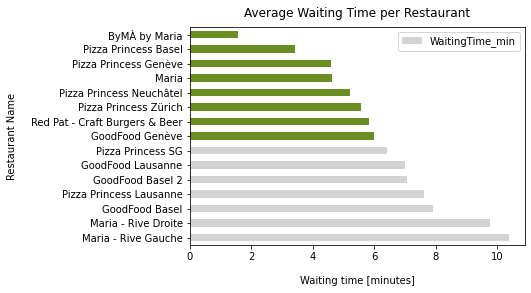

In [12]:
# Let's show this in a bar plot:
col = []
for val in mean_waiting_times['WaitingTime_min']:
    if val < 6:
        col.append('olivedrab')
    else:
        col.append('lightgrey')

mean_waiting_times.plot(x='restaurantName', y= 'WaitingTime_min',kind="barh", color=col)
plt.xlabel("Waiting time [minutes]", labelpad=14)
plt.ylabel("Restaurant Name", labelpad=14)
plt.title("Average Waiting Time per Restaurant", y=1.02)
print("For GoodFood Lausanne and GooFood Basel 2, waiting time is longer than 6 minutes!")

# Waiting Time per Area

In [13]:
complete_orders.groupby('area')['WaitingTime_min'].mean().sort_values(ascending=False)

area
DE    6.779706
FR    6.335233
Name: WaitingTime_min, dtype: float64